# Africa Credit Challenge

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Plot style set
sns.set_palette("husl")

## Load and Inspect Dataset

In [21]:
# Loading the train dataset
df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
economic_df= pd.read_csv('economic_indicators.csv')

#### Basic information of Dataset

In [22]:
print("Train Shape: ",df.shape)
print("Test Shape: ",test_df.shape)
print("Economic indicators Shape: ",economic_df.shape)

Train Shape:  (68654, 16)
Test Shape:  (18594, 15)
Economic indicators Shape:  (27, 25)


In [23]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [24]:
print(test_df.info())
print("\nMissing values:\n", test_df.isnull().sum())
display(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18594 non-null  object 
 1   customer_id                  18594 non-null  int64  
 2   country_id                   18594 non-null  object 
 3   tbl_loan_id                  18594 non-null  int64  
 4   lender_id                    18594 non-null  int64  
 5   loan_type                    18594 non-null  object 
 6   Total_Amount                 18594 non-null  float64
 7   Total_Amount_to_Repay        18594 non-null  float64
 8   disbursement_date            18594 non-null  object 
 9   due_date                     18594 non-null  object 
 10  duration                     18594 non-null  int64  
 11  New_versus_Repeat            18594 non-null  object 
 12  Amount_Funded_By_Lender      18594 non-null  float64
 13  Lender_portion_F

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594.000000,18594.000000,18594.000000,1.859400e+04,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,262489.507207,282416.633538,271876.749274,1.446507e+04,1.578416e+04,13.530763,2278.430133,0.207090,2466.451967
std,28957.312848,52907.548852,12349.646095,1.569085e+05,1.871893e+05,36.437325,6784.429774,0.122085,7680.081817
min,6083.000000,104034.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250357.000000,240880.500000,267278.000000,2.101900e+03,2.164480e+03,7.000000,239.360000,0.131313,244.035000
50%,259107.000000,273442.500000,267278.000000,4.740000e+03,4.828000e+03,7.000000,744.575000,0.300000,758.920000
75%,270051.250000,304856.000000,267278.000000,1.026775e+04,1.056757e+04,7.000000,1998.000000,0.300000,2041.000000
max,312696.000000,375320.000000,297183.000000,2.000000e+07,2.415284e+07,849.000000,400000.000000,1.000000,423400.000000


In [25]:
display(economic_df.head().T)

,0,1,2,3,4
Country,Ghana,Cote d'Ivoire,Kenya,Ghana,Cote d'Ivoire
Indicator,"Inflation, consumer prices (annual %)","Inflation, consumer prices (annual %)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period av...","Official exchange rate (LCU per US$, period av..."
YR2001,41.509496,4.361529,5.738598,0.716305,732.397693
YR2002,9.360932,3.077265,1.961308,0.792417,693.713226
YR2003,29.77298,3.296807,9.815691,0.866764,579.897426
YR2004,18.042739,1.457988,11.624036,0.899495,527.338032
YR2005,15.438992,3.88583,10.312778,0.905209,527.258363
YR2006,11.679184,2.467191,14.453734,0.915107,522.425625
YR2007,10.734267,1.892006,9.75888,0.932619,478.633718
YR2008,16.49464,6.308528,26.239817,1.052275,446.000041


In [26]:
# Check column types & missing values
df.isna().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [27]:
# Investigate numerical data
df.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [28]:
# Data Quality Checks
print("\n Duplicate rows:", df.duplicated().sum())


 Duplicate rows: 0


### Data Cleaning

In [29]:
def clean_dataset(df):
    # Create a cop of dataframe
    df = df.copy()

    # Format column names to lowercase
    df.columns = df.columns.str.lower()

    # Convert dates
    try:
        df['due_date'] = pd.to_datetime(df['due_date'])
        df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
    except KeyError as e:
        print(f"Warning: Date column not found - {e}")
    except ValueError as e:
        print(f"Warning: Date conversion error - {e}")
        
    # Get categorical columns
    categorical = list(df.dtypes[df.dtypes == 'object'].index)
    print("Categorical columns:", categorical)
    
    # Format strings in categorical columns
    for col in categorical:
            df[col] = df[col].str.lower().str.replace(' ', '_')
    
    # Drop customer_id
    if 'customer_id' in df.columns:
        df = df.drop('customer_id', axis=1)
        
    if 'tbl_loan_id' in df.columns:
        df = df.drop('tbl_loan_id', axis=1)

    # convert lender_id to object
    df.lender_id = df.lender_id.astype('str')
    
    return df

In [30]:
# Dataset Cleaning
df = clean_dataset(df)
test_df = clean_dataset(test_df)
display(df.head(5))
print()
print(df.info())

Categorical columns: ['id', 'country_id', 'loan_type', 'new_versus_repeat']
Categorical columns: ['id', 'country_id', 'loan_type', 'new_versus_repeat']


,id,country_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target
0,id_266671248032267278,kenya,267278,type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,repeat_loan,120.85,0.014305,121.0,0
1,id_248919228515267278,kenya,267278,type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,repeat_loan,7768.50,0.300000,7794.0,0
2,id_308486370501251804,kenya,251804,type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,repeat_loan,1380.00,0.200000,1428.0,0
3,id_266004285009267278,kenya,267278,type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,repeat_loan,2687.40,0.300000,2770.0,0
4,id_253803305312267278,kenya,267278,type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,repeat_loan,1369.20,0.300000,1418.0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           68654 non-null  object        
 1   country_id                   68654 non-null  object        
 2   lender_id                    68654 non-null  object        
 3   loan_type                    68654 non-null  object        
 4   total_amount                 68654 non-null  float64       
 5   total_amount_to_repay        68654 non-null  float64       
 6   disbursement_date            68654 non-null  datetime64[ns]
 7   due_date                     68654 non-null  datetime64[ns]
 8   duration                     68654 non-null  int64         
 9   new_versus_repeat            68654 non-null  object        
 10  amount_funded_by_lender      68654 non-null  float64       
 11  lender_portion_funded        68654 non-n

In [31]:
# Final Train Dataset Cleaning
display(test_df.head(5))
print(test_df.info())

,id,country_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid
0,id_269404226088267278,kenya,267278,type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,repeat_loan,575.7,0.300000,597.0
1,id_255356300042267278,kenya,267278,type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,repeat_loan,0.0,0.000000,0.0
2,id_257026243764267278,kenya,267278,type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,repeat_loan,207.0,0.025079,208.0
3,id_264617299409267278,kenya,267278,type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,repeat_loan,1013.7,0.300000,1014.0
4,id_247613296713267278,kenya,267278,type_1,120.0,120.0,2022-11-10,2022-11-17,7,repeat_loan,36.0,0.300000,36.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           18594 non-null  object        
 1   country_id                   18594 non-null  object        
 2   lender_id                    18594 non-null  object        
 3   loan_type                    18594 non-null  object        
 4   total_amount                 18594 non-null  float64       
 5   total_amount_to_repay        18594 non-null  float64       
 6   disbursement_date            18594 non-null  datetime64[ns]
 7   due_date                     18594 non-null  datetime64[ns]
 8   duration                     18594 non-null  int64         
 9   new_versus_repeat            18594 non-null  object        
 10  amount_funded_by_lender      18594 non-null  float64       
 11  lender_portion_funded        18594 non-nu

# EDA
- Target variable analysis
- Loan characteristics analysis




### Target variable analysis

In [32]:
# Default statistics

total_loans = len(df)
total_defaults = df.target.sum()
default_rate = (total_defaults/total_loans)*100
print('Total number of loans: ',total_loans)
print('Number of defaults: ',total_defaults)
print('Number of non-defautls: ',total_loans-total_defaults)
print('Overall default rate: ',f'{default_rate:.2f}%')

Total number of loans:  68654
Number of defaults:  1258
Number of non-defautls:  67396
Overall default rate:  1.83%


#### Default rates by key segments

In [33]:
# default rate by loan type
loan_type_defaults = df.groupby('loan_type')['target'].agg([
    ('total_loans','count'),
    ('defaults','sum'),
    ('default_rate','mean')
])

loan_type_defaults['default_rate'] = loan_type_defaults['default_rate']*100

display(loan_type_defaults.sort_values('default_rate',ascending=False)[:15])

,total_loans,defaults,default_rate
loan_type,,,
type_15,4,3,75.000000
type_23,18,13,72.222222
type_14,99,71,71.717172
type_2,74,45,60.810811
type_20,13,7,53.846154
type_9,205,36,17.560976
type_4,1235,152,12.307692
type_6,357,38,10.644258
type_7,2790,235,8.422939


In [34]:
# Default rate by new vs repeat customers
customer_type_defaults = df.groupby('new_versus_repeat')['target'].agg({
     ('total_loans','count'),
    ('defaults','sum'),
    ('default_rate','mean')
})

customer_type_defaults['default_rate'] = customer_type_defaults['default_rate']*100

display(customer_type_defaults.sort_values('default_rate',ascending=False))

,defaults,total_loans,default_rate
new_versus_repeat,,,
new_loan,119,567,20.987654
repeat_loan,1139,68087,1.672860


#### Visualizations

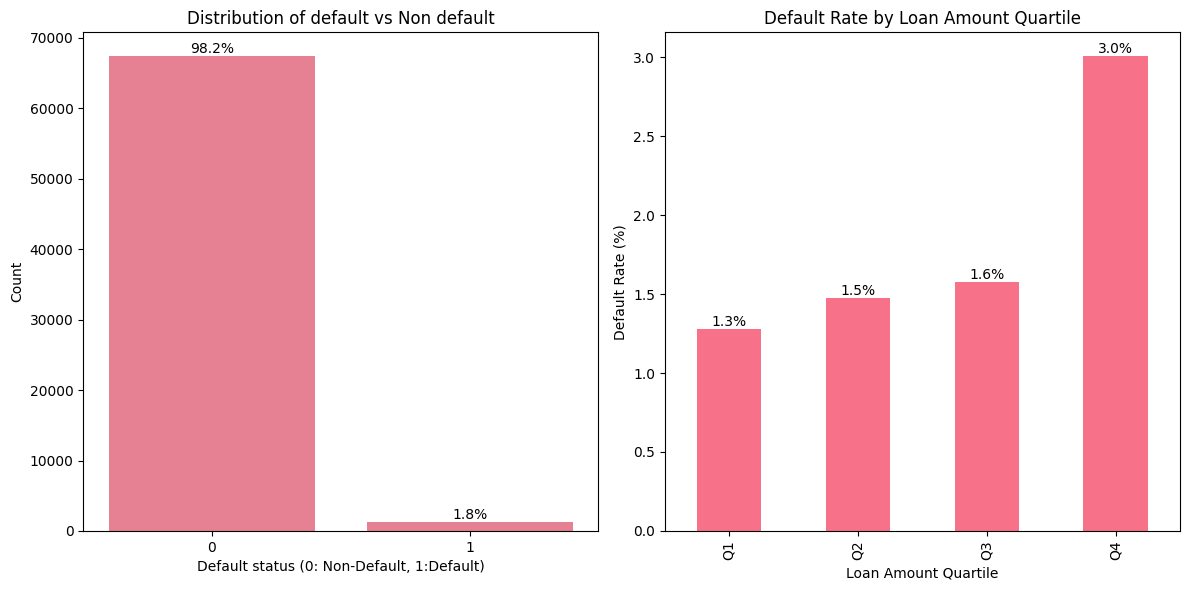

In [35]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

# Overall default distribution
sns.countplot(data=df,x='target',ax=axes[0])
axes[0].set_title('Distribution of default vs Non default')
axes[0].set_xlabel('Default status (0: Non-Default, 1:Default)')
axes[0].set_ylabel('Count')

total = len(df)
for p in axes[0].patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    axes[0].annotate(percentage,(x,y),ha='center',va='bottom')
    
# PLot 2: Default rates by loan amount quatiles
df['amount_quartile'] = pd.qcut(df['total_amount'],q=4,labels=['Q1','Q2','Q3','Q4'])
test_df['amount_quartile'] = pd.qcut(test_df['total_amount'],q=4,labels=['Q1','Q2','Q3','Q4'])
quartile_defaults = df.groupby('amount_quartile')['target'].mean()*100
quartile_defaults.plot(kind='bar',ax=axes[1])
axes[1].set_title('Default Rate by Loan Amount Quartile')
axes[1].set_xlabel('Loan Amount Quartile')
axes[1].set_ylabel('Default Rate (%)')

for i,v in enumerate(quartile_defaults):
    axes[1].text(i,v,f'{v:.1f}%',ha='center',va='bottom')
plt.tight_layout()
plt.show()

### Loan characteristics

In [36]:
# Loan type distribution
df.loan_type.value_counts()

loan_type
type_1     61723
type_7      2790
type_5      1521
type_4      1235
type_10      466
type_6       357
type_9       205
type_14       99
type_2        74
type_11       42
type_18       30
type_17       23
type_12       21
type_23       18
type_20       13
type_16       12
type_13       10
type_19        4
type_15        4
type_21        3
type_24        3
type_22        1
Name: count, dtype: int64

In [37]:
# New vs repeat customers analysis
df.new_versus_repeat.value_counts()

new_versus_repeat
repeat_loan    68087
new_loan         567
Name: count, dtype: int64

In [38]:
# Default rates by loan type
loan_default_rates = df.groupby('loan_type')['target'].mean().sort_values(ascending=False)*100
print('Loan default rates')
print(loan_default_rates)

Loan default rates
loan_type
type_15    75.000000
type_23    72.222222
type_14    71.717172
type_2     60.810811
type_20    53.846154
type_9     17.560976
type_4     12.307692
type_6     10.644258
type_7      8.422939
type_5      8.021039
type_12     4.761905
type_11     4.761905
type_18     3.333333
type_10     2.575107
type_1      0.842474
type_13     0.000000
type_16     0.000000
type_17     0.000000
type_19     0.000000
type_21     0.000000
type_22     0.000000
type_24     0.000000
Name: target, dtype: float64


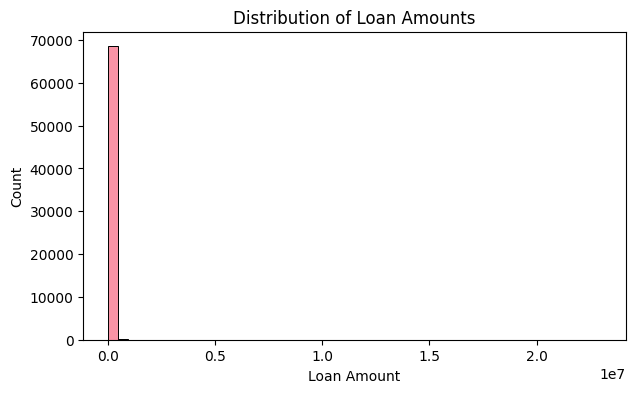

In [39]:
# Loan amount type distribution
plt.figure(figsize=(7,4))
sns.histplot(data=df,x='total_amount',bins=50)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()

In [40]:
df.total_amount.describe()

count    6.865400e+04
mean     1.483683e+04
std      1.416499e+05
min      2.000000e+00
25%      2.295000e+03
50%      5.249000e+03
75%      1.145000e+04
max      2.300000e+07
Name: total_amount, dtype: float64

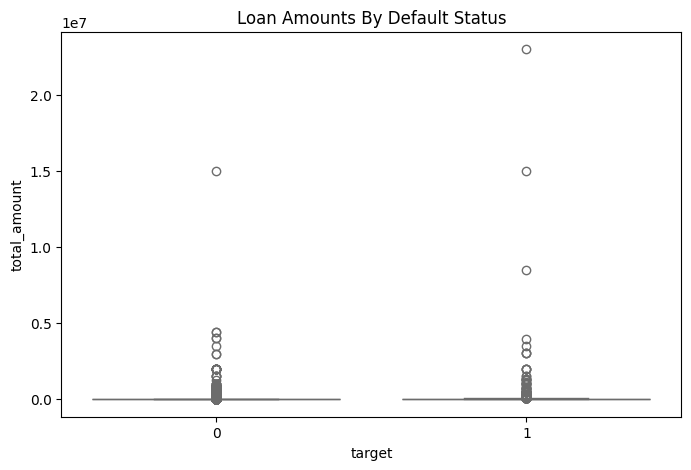

In [41]:
# Box plot loan amounts by default status
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='target',y='total_amount')
plt.title('Loan Amounts By Default Status')
plt.show()

### Temporal Analysis

In [42]:

def temporal_analysis(df):
    df['year'] = df['disbursement_date'].dt.year
    df['month'] = df['disbursement_date'].dt.month
    return df
df = temporal_analysis(df)
test_df = temporal_analysis(test_df)

In [43]:
yearly_defaults = df.groupby('year')['target'].mean()*100
print(yearly_defaults)

year
2021    53.846154
2022     1.298036
2023    11.532258
2024     8.686869
Name: target, dtype: float64


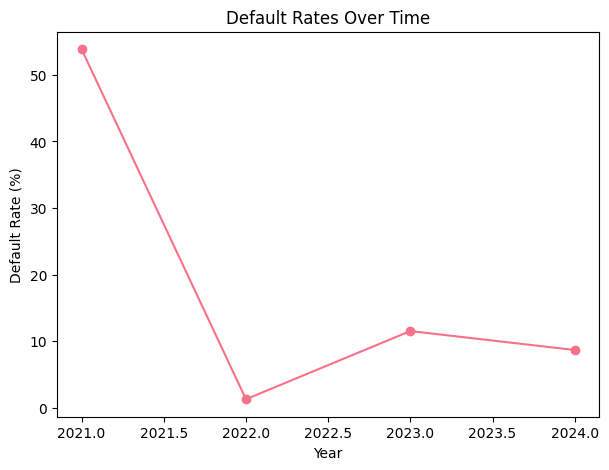

In [44]:
plt.figure(figsize=(7,5))
yearly_defaults.plot(kind='line',marker='o')
plt.title('Default Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Default Rate (%)')
plt.show()

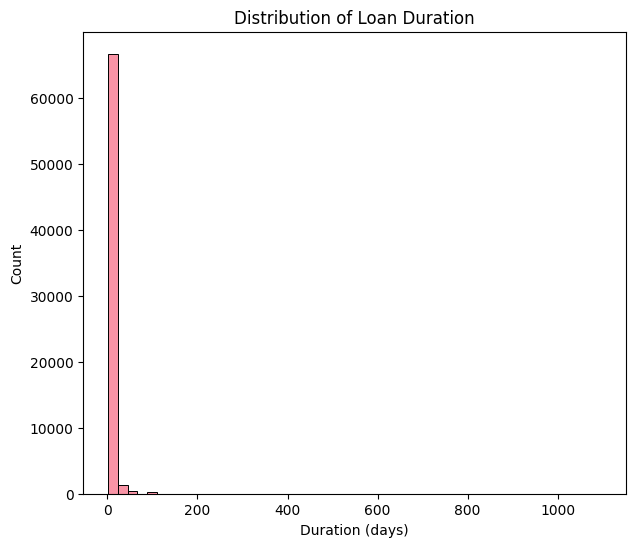

In [45]:
plt.figure(figsize=(7,6))
sns.histplot(data=df,x='duration',bins=50)
plt.title('Distribution of Loan Duration')
plt.xlabel('Duration (days)')
plt.show()

### Economic Indicator Analysis

In [46]:
economic_df.columns = economic_df.columns.str.lower()

In [47]:
economic_categorical = list(economic_df.dtypes[economic_df.dtypes == 'object'].index)
for col in economic_categorical:
    economic_df[col] = economic_df[col].str.lower().str.replace(' ', '_')

In [48]:
economic_df.indicator.unique()

array(['inflation,_consumer_prices_(annual_%)',
       'official_exchange_rate_(lcu_per_us$,_period_average)',
       'real_interest_rate_(%)',
       'average_precipitation_in_depth_(mm_per_year)',
       'deposit_interest_rate_(%)', 'lending_interest_rate_(%)',
       'interest_rate_spread_(lending_rate_minus_deposit_rate,_%)',
       'fossil_fuel_energy_consumption_(%_of_total)', 'unemployment_rate'],
      dtype=object)

In [49]:
economic_pivot = economic_df.pivot(index='country', columns='indicator')
economic_pivot.fillna(0).describe()

yr2001  \
indicator average_precipitation_in_depth_(mm_per_year)   
count                                         3.000000   
mean                                       1055.000000   
std                                         376.761198   
min                                         630.000000   
25%                                         908.500000   
50%                                        1187.000000   
75%                                        1267.500000   
max                                        1348.000000   

                                     \
indicator deposit_interest_rate_(%)   
count                      3.000000   
mean                      12.497778   
std                       16.239994   
min                        0.000000   
25%                        3.319583   
50%                        6.639167   
75%                       18.746667   
max                       30.854167   

                                                       \
indicator fossil_fuel_energy_consumption_(%_of_total)   
count                                        3.000000   
mean                                        27.631967   
std                                          9.766144   
min                                         16.421786   
25%                                         24.298753   
50%                                         32.175719   
75%                                         33.237058   
max                                         34.298397   

                                                 \
indicator inflation,_consumer_prices_(annual_%)   
count                                  3.000000   
mean                                  17.203208   
std                                   21.061121   
min                                    4.361529   
25%                                    5.050064   
50%                                    5.738598   
75%                                   23.624047   
max                                   41.509496   

                                                                     \
indicator interest_rate_spread_(lending_rate_minus_deposit_rate,_%)   
count                                               3.000000          
mean                                                4.342222          
std                                                 7.520950          
min                                                 0.000000          
25%                                                 0.000000          
50%                                                 0.000000          
75%                                                 6.513333          
max                                                13.026667          

                                     \
indicator lending_interest_rate_(%)   
count                      3.000000   
mean                       6.555278   
std                       11.354074   
min                        0.000000   
25%                        0.000000   
50%                        0.000000   
75%                        9.832917   
max                       19.665833   

                                                                \
indicator official_exchange_rate_(lcu_per_us$,_period_average)   
count                                               3.000000     
mean                                              270.559064     
std                                               401.853486     
min                                                 0.716305     
25%                                                39.639750     
50%                                                78.563195     
75%                                               405.480444     
max                                               732.397693     

                                                    \
indicator real_interest_rate_(%) unemployment_rate   
count                   3.000000          3.000000   
mean                    5.937500          5.890333   
std            

### Correlation Analysis

In [50]:
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
numerical_cols

Index(['total_amount', 'total_amount_to_repay', 'duration',
       'amount_funded_by_lender', 'lender_portion_funded',
       'lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [51]:
corr_matrix = df[numerical_cols].corr()

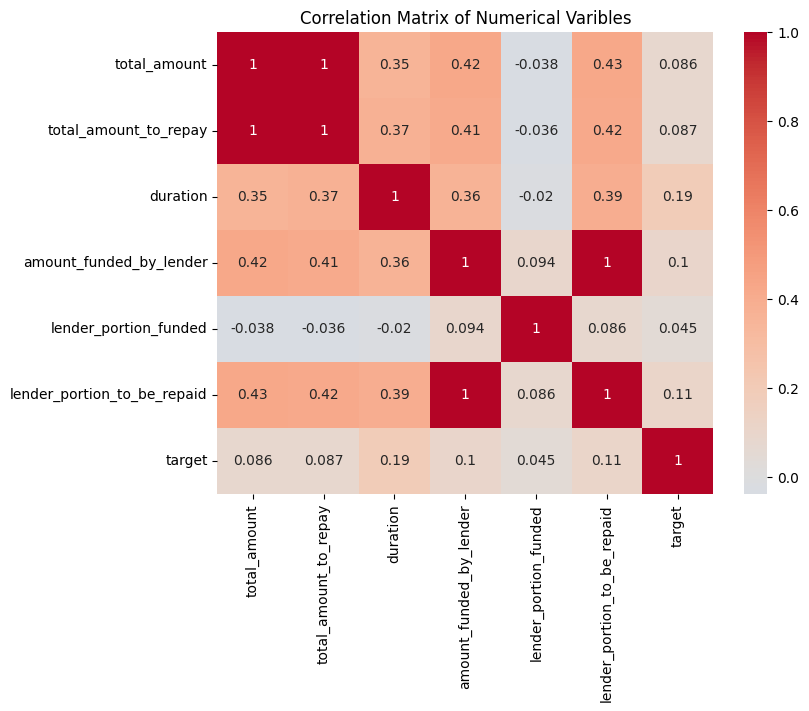

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Matrix of Numerical Varibles')
plt.show()

In [53]:
target_corr = corr_matrix['target'].sort_values(ascending=False)
target_corr

target                         1.000000
duration                       0.189889
lender_portion_to_be_repaid    0.109517
amount_funded_by_lender        0.101845
total_amount_to_repay          0.087089
total_amount                   0.086043
lender_portion_funded          0.045418
Name: target, dtype: float64

### Feature Engineering

In [54]:
def feature_engineering(df):
    # Basic feature engineering
    df['loan_repayment_ratio'] = df['total_amount'] / df.total_amount_to_repay
    df.loan_term_days = (df.due_date - df.disbursement_date).dt.days
    df.amount_category = pd.qcut(df.total_amount,q=5,labels=['very_low','low','medium','high','very_high'])

    # Incorprating economic factors
    economic_long = economic_df.melt(
        id_vars=['country','indicator'],
        var_name='year',
        value_name='value'
    )

    economic_long.year = economic_long.year.str[2:].astype(int)

    economic_pivot = economic_long.pivot_table(
    index=['country','year'],
    columns='indicator',
    values='value'
    ).reset_index()

    df = df.merge(
    economic_pivot,
    left_on=['country_id','year'],
    right_on=['country','year'],
    how='left'
    )
    # test_df = test_df.merge(
    # economic_pivot,
    # left_on=['country_id','year'],
    # right_on=['country','year'],
    # how='left'
    # )

    df = df.drop(columns=['average_precipitation_in_depth_(mm_per_year)','fossil_fuel_energy_consumption_(%_of_total)'])

    economic_cols = [col for col in economic_pivot.columns if col in df.columns]

    for col in economic_cols:
        if df[col].dtype in ['float','int64']:
            df[f'{col}_yoy_change'] = df.groupby('country_id')[col].pct_change()
            df[f'{col}_zscore'] = df.groupby('country_id')[col].transform(
                lambda x: (x-x.mean())/x.std()
            )

    return df

In [55]:
df = feature_engineering(df)
test_df = feature_engineering(test_df)
economic_df = feature_engineering(df)

In [56]:
from sklearn.metrics import mutual_info_score

In [57]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [58]:
df.country.ffill(inplace=True)
test_df.country.ffill(inplace=True)

In [59]:
# categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.to_numpy()
numerical_cols = df.select_dtypes(include=['float64','int64']).columns.to_numpy()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [60]:
numerical_cols = test_df.select_dtypes(include=['float64','int64']).columns
test_df[numerical_cols] = test_df[numerical_cols].fillna(test_df[numerical_cols].mean())

In [61]:
df.isna().sum()

id                                                                      0
country_id                                                              0
lender_id                                                               0
loan_type                                                               0
total_amount                                                            0
total_amount_to_repay                                                   0
disbursement_date                                                       0
due_date                                                                0
duration                                                                0
new_versus_repeat                                                       0
amount_funded_by_lender                                                 0
lender_portion_funded                                                   0
lender_portion_to_be_repaid                                             0
target                                

In [62]:
test_df.isna().sum()

id                                                                      0
country_id                                                              0
lender_id                                                               0
loan_type                                                               0
total_amount                                                            0
total_amount_to_repay                                                   0
disbursement_date                                                       0
due_date                                                                0
duration                                                                0
new_versus_repeat                                                       0
amount_funded_by_lender                                                 0
lender_portion_funded                                                   0
lender_portion_to_be_repaid                                             0
amount_quartile                       

In [63]:
# def prepare_data_splits(df,testsize=0.2,mval_size=0.25,random_state=42):
#     df = df.copy
#     ids = df['id']

#     cols_to_drop = ['due_date','disbursement_date']

#     # Split into train and test
#     df_full_train,df_test = train_test_split(
#         df_model,
#         test_size = test_size,
#         random_state=random_state,
#         stratify=df_model['target'] if 'target' in df_model.columns else None
#     )

#     df_train,df_val = train_test_split(
#         df_full_train,
#         test_size = val_size,
#         random_state=random_state,
#         stratify=df_full_train['target'] if 'target' in df_full_train.columns else None
#     )

#     def separate_features_target(data):
#         X = data.drop('target',axis=1) is 'target' in data.columns else data
#         y = data['target'] if 'target' in data.columns else None
#         return X,y

#     X_train,y_train = separate_features_target(df_train)
#     X_val,y_val = separate_features_target(df_val)
#     X_test,y_test = separate_features_target(df_test)

#     print('Train set shape: ', X_train.shape)
#     print('Validation set shape: ', X_val.shape)
#     print('Test set shape: ', X_test.shape)

#     return X_train,X_val,X_test,y_train,y_val,y_test

# X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_splits(df)

In [64]:
 # Feature and Traget Selection
x = df.drop(columns=['lender_id','due_date','disbursement_date','target'])
y=df[['target']]
categorical_features= x.select_dtypes(include=['object','category']).columns.to_numpy()
numerical_cols = x.select_dtypes(include=['float64','int64']).columns.to_numpy()
df[numerical_cols] = x[numerical_cols].fillna(df[numerical_cols].mean())
test_df = test_df.drop(columns=['due_date','disbursement_date','country_id'])
#df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
#df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [65]:
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=42, test_size=0.2)

In [66]:
from catboost import CatBoostClassifier
params = {'depth': [4, 6, 8],
          'iterations': [100, 300, 500],
          'learning_rate': [0.01, 0.05, 0.1]}
model=GridSearchCV(CatBoostClassifier(cat_features=categorical_features, verbose=0),params, cv=3, 
                   scoring="f1")
model.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021778EACD60>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 300, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1')

In [67]:
#predict probabilities on the validation data for a customer defaulting[1]
y_prediction_probability=model.predict_proba(x_val)[:,1]
y_pred=(y_prediction_probability >= 0.5).astype(int)   # Convert probabilities to 0 or 1

In [68]:
#Evaluate model
roc_auc=roc_auc_score(y_val,y_prediction_probability)
f1=f1_score(y_val, y_pred)
print(f"AUC score :{roc_auc:.4f}")
print(f"F1 score :{f1:.4f}")

AUC score :0.9970
F1 score :0.8667


In [69]:
#test model with test dataset
test_predictions=model.predict(test_df)
test_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#Final model evaluation on the test data

In [70]:
#Check distribution of classes on the test data
unique,counts=np.unique(test_predictions,return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))


Class Distribution: {0: 17909, 1: 685}


In [71]:
#display ID and target as dataframe
submission_data=pd.DataFrame({
    "ID":test_df['id'].str.upper(),
    "target":test_predictions
})
submission_data

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0
2,ID_257026243764267278,0
3,ID_264617299409267278,0
4,ID_247613296713267278,0
...,...,...
18589,ID_297596365331297183,0
18590,ID_259715231897267278,0
18591,ID_296701364008297183,0
18592,ID_268271242864267278,0


In [ ]:
# Save the prediction results to a CSV file
submission_data.to_csv('submission.csv', index=False)
print("Data submitted")

Data submitted


In [73]:
# #evaluate model on test data
# test_pred=(test_predictions >= 0.5).astype(int)
# test_roc_auc=roc_auc_score(test_df,test_predictions)
# test_f1=f1_score(test_df, test_pred)
# print(f"Test AUC score :{test_roc_auc:.4f}")
# print(f"Test F1 score :{test_f1:.4f}") 


In [74]:
# df_full_train = df_full_train.reset_index(drop=True)
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [75]:
# y_full_train = df_full_train.target.values
# y_train = df_train.target.values
# y_val = df_val.target.values
# y_test = df_test.target.values

# del df_full_train['target']
# del df_train['target']
# del df_val['target']
# del df_test['target']

### Model Training

Validation Framework Setup

In [76]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.metrics import f1_score,make_scorer
# from tqdm.auto import tqdm
# from sklearn.tree import DecisionTreeClassifier
# import pickle

In [77]:
# def logistic_regression_model(df_train,df_val,y_train,y_val):
#     # One hot Encoding
#     dv = dv(sparse=False)
#     train_dict = df_train.to_dict(orient='records')
#     X_train = dv.fit_transform(train_dict)
    
#     val_dict = df_val.to_dict(orient='records')
#     X_val = dv.transform(val_dict)

#     # parameter grid
#     param_grid = {
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear', 'saga'], 
#         'class_weight': [None, 'balanced'],
#         'max_iter': [1000]
#     }

#     base_model=LogisticRegression()

#     f1 = make_scorer(f1_score)

#     #grid_search setup
#     grid_Search = GridSearchCV(
#         estimator=base_model,
#         param_grid = param_grid,
#         cv=5,
#         scoring=f1,
#         n_jobs=-1,
#         verbose=1
#     )

#     #Fit grid search
#     grid_Search.fit(X_train,y_train)

#     # print best parameters
#     print('Best parameters: ',grid_Search.best_params_)
#     print('Best F1 Score: ',grid_Search.best_score_)

#     # Predictions
#     best_model = grid_Search.best_estimator_
#     y_pred = best_model.predict_proba(X_val)[:,1]

#     default = (y_pred >= 0.5)

#     # val metrics

#     val_f1 = f1_score(y_val,default)
#     print("Validation F1 Score: ", val_f1)

#     return best_model,dv,default
# best_model_grid, dv_grid, predictions_grid = logistic_regression_model(df_train,df_val,y_train,y_val)

In [78]:
# def decision_tree_model(df_train,df_val,y_train,y_val):
#     # One hot Encoding
#     dv = DictVectorizer(sparse=False)
#     train_dict = df_train.to_dict(orient='records')
#     X_train = dv.fit_transform(train_dict)
    
#     val_dict = df_val.to_dict(orient='records')
#     X_val = dv.transform(val_dict)

#     # parameter grid
#     param_grid = {
#         'max_depth': [1, 2, 3, 4, 5, 6, 10, 15, 20,None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 5, 10, 15, 20, 50, 100, 200],
#         'class_weight': [None, 'balanced'],
#         'criterion': ['gini', 'entropy'],
#         'max_features': ['sqrt', 'log2', None]
#     }

#     base_model=DecisionTreeClassifier()

#     f1 = make_scorer(f1_score)

#     #grid_search setup
#     grid_Search = GridSearchCV(
#         estimator=base_model,
#         param_grid = param_grid,
#         cv=5,
#         scoring=f1,
#         n_jobs=-1,
#         verbose=1
#     )

#     #Fit grid search
#     grid_Search.fit(X_train,y_train)

#     # print best parameters
#     print('Best parameters: ',grid_Search.best_params_)
#     print('Best F1 Score: ',grid_Search.best_score_)

#     # Predictions
#     best_model = grid_Search.best_estimator_
#     y_pred = best_model.predict_proba(X_val)[:,1]

#     val_f1 = f1_score(y_val,y_pred)
#     print("Validation F1 Score: ", val_f1)

#     return best_model,dv
# best_model_grid, dv_grid = decision_tree_model(df_train,df_val,y_train,y_val)

In [79]:
# import pickle

In [80]:
# pickle.dump((best_model_grid,dv_grid),open('logistic_model_0_72','wb'))

In [81]:
# model,dv = pickle.load(open('logistic_model_0_72','rb'))

In [82]:
# Test model with df_test
# test_dict = df_test.to_dict(orient='records')
# X_test = dv.transform(test_dict)
# y_predict_proba = model.predict_proba(X_test)[:,1]
# defaults = (y_predict_proba >= 0.5).astype(int)
# print("Default: ",(defaults == y_test).mean())
# val_f1 = f1_score(y_test,defaults)
# print("Validation F1 Score: ", val_f1)

In [83]:
# Full train model
# def train_full_model(df_full_train,y_full_train):
#     dv = DictVectorizer(sparse=False)
#     full_train_dict = df_full_train.to_dict(orient='records')
#     X_full_train = dv.fit_transform(full_train_dict)

#     model = LogisticRegression(penalty='l1',C=1,class_weight=None,max_iter=1000,solver='liblinear')
#     model.fit(X_full_train,y_full_train)

#     return model,dv

In [84]:
# full_model,dv = train_full_model(df_full_train,y_full_train)

In [85]:
# Test model with df_test
# def predict_test_set(df_final_test_prepared, model, dv):
#     test_dict = df_final_test_prepared.to_dict(orient='records')
#     X_test = dv.transform(test_dict)
#     y_predict_proba = model.predict_proba(X_test)[:,1]
#     predictions = (y_predict_proba >= 0.5).astype(int)
#     final = dict(zip(df_final_test_prepared['id'].str.upper(), predictions))
#     return final

In [86]:
# def prepare_final_test_data(df_final_test):
    
#     df_test = df_final_test.copy()
    
#     cols_to_drop = ['due_date', 'disbursement_date']
#     df_test = df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns])
    
#     return df_test



# def format_predictions_for_csv(predictions, output_file='submission.csv'):
#     submission = pd.DataFrame(list(predictions.items()), columns=['ID', 'target'])

#     submission = submission.sort_values('ID')
    
#     submission.to_csv(output_file, index=False)
    
#     print("\nFirst few rows of submission file:")
#     print(submission.head())
    
#     print(f"\nSubmission saved to {output_file}")
#     print(f"Total predictions: {len(submission)}")

In [87]:
# model, dv = train_full_model(df_full_train, y_full_train)

In [88]:
# df_final_test_prepared = prepare_final_test_data(test_df)
# df_final_test_prepared.info()

In [89]:
# col_final = list(df_final_test_prepared.columns)
# col_test = list(df_test.columns)

# # Check if the columns are the same
# print("Columns are the same: ", col_final == col_test)
# for col in col_test:
#     if col not in col_final:
#         print(col)

In [90]:
# final_predictions = predict_test_set(df_final_test_prepared, model, dv)
# print(final_predictions)

In [91]:
# format_predictions_for_csv(final_predictions, 'submission.csv')